## Cargar paquetería

In [ ]:
# Paquetería
import pandas as pd
import folium
from folium.plugins import MarkerCluster
import requests
import matplotlib.pyplot as plt
import seaborn as sns

Cargar base de datos

In [ ]:
# Cargar el archivo CSV
df = pd.read_csv('/content/inViales_2022_2024.csv')

In [ ]:
# Información general del dataframe
print("\nInformación general del dataframe:")
print(df.info())
## Se requiere cambiar las variables a categorias y generar fechas de horario/fecha


Información general del dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187831 entries, 0 to 187830
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   folio              187831 non-null  object 
 1   fecha_creacion     187831 non-null  object 
 2   hora_creacion      187831 non-null  object 
 3   dia_semana         187831 non-null  object 
 4   fecha_cierre       187831 non-null  object 
 5   hora_cierre        187831 non-null  object 
 6   tipo_incidente_c4  187831 non-null  object 
 7   incidente_c4       187831 non-null  object 
 8   alcaldia_inicio    187797 non-null  object 
 9   codigo_cierre      187831 non-null  object 
 10  clas_con_f_alarma  187831 non-null  object 
 11  tipo_entrada       187825 non-null  object 
 12  alcaldia_cierre    187796 non-null  object 
 13  alcaldia_catalogo  187614 non-null  object 
 14  colonia_catalogo   183450 non-null  object 
 15  longitud       

In [ ]:
# Primero combinamos fecha y hora para las columnas de creación y cierre
df['fecha_hora_creacion'] = pd.to_datetime(df['fecha_creacion'] + ' ' + df['hora_creacion'])
df['fecha_hora_cierre'] = pd.to_datetime(df['fecha_cierre'] + ' ' + df['hora_cierre'])
df['fecha_creacion'] = pd.to_datetime(df['fecha_creacion'] )

In [ ]:
df.drop(['hora_creacion','hora_cierre','fecha_cierre'], axis=1, inplace=True)
df

,folio,fecha_creacion,dia_semana,tipo_incidente_c4,incidente_c4,alcaldia_inicio,codigo_cierre,clas_con_f_alarma,tipo_entrada,alcaldia_cierre,alcaldia_catalogo,colonia_catalogo,longitud,latitud,fecha_hora_creacion,fecha_hora_cierre
0,C2C/20211229/00212,2021-12-29,Miércoles,Lesionado,Atropellado,NaN,I,URGENCIAS MEDICAS,BOTÓN DE AUXILIO,NaN,Cuauhtémoc,Roma Norte,-99.163670,19.421610,2021-12-29 23:21:20,2022-01-01 00:24:06
1,C2C/20211231/00183,2021-12-31,Viernes,Lesionado,Atropellado,CUAUHTEMOC,A,URGENCIAS MEDICAS,BOTÓN DE AUXILIO,CUAUHTEMOC,Cuauhtémoc,Obrera,-99.144270,19.409910,2021-12-31 23:48:03,2022-01-01 06:29:52
2,C2C/20220101/00012,2022-01-01,Sábado,Accidente,Choque con lesionados,CUAUHTEMOC,A,URGENCIAS MEDICAS,BOTÓN DE AUXILIO,CUAUHTEMOC,Cuauhtémoc,Doctores,-99.148320,19.415250,2022-01-01 01:06:39,2022-01-01 06:00:12
3,C2C/20220101/00070,2022-01-01,Sábado,Accidente,Motociclista,CUAUHTEMOC,A,URGENCIAS MEDICAS,RADIO,CUAUHTEMOC,Miguel Hidalgo,Tlaxpana,-99.165781,19.443649,2022-01-01 09:51:53,2022-01-01 12:54:10
4,C2N/20211231/00128,2021-12-31,Viernes,Accidente,Choque sin lesionados,IZTACALCO,A,EMERGENCIA,BOTÓN DE AUXILIO,IZTACALCO,Iztacalco,Agricola Pantitlan,-99.060450,19.414620,2021-12-31 23:03:05,2022-01-01 06:16:42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504256,C5/20240229/04009,2024-02-29,Jueves,Accidente,Choque con lesionados,IZTAPALAPA,A,URGENCIAS MEDICAS,LLAMADA DEL 911,IZTAPALAPA,Iztapalapa,El Vergel,-99.087270,19.320600,2024-02-29 19:53:36,2024-02-29 23:16:21
504257,C5/20240229/04038,2024-02-29,Jueves,Accidente,Choque con lesionados,CUAUHTEMOC,A,URGENCIAS MEDICAS,RADIO,CUAUHTEMOC,Cuauhtémoc,Centro,-99.125200,19.428723,2024-02-29 20:01:42,2024-02-29 23:06:17
504258,C5/20240229/04286,2024-02-29,Jueves,Accidente,Choque con lesionados,IZTAPALAPA,D,URGENCIAS MEDICAS,LLAMADA DEL 911,IZTAPALAPA,Iztapalapa,Apatlaco,-99.119881,19.380011,2024-02-29 20:43:20,2024-02-29 23:46:22
504259,C5/20240229/04300,2024-02-29,Jueves,Accidente,Motociclista,IZTAPALAPA,F,URGENCIAS MEDICAS,LLAMADA DEL 911,IZTAPALAPA,Iztapalapa,Guadalupe Del Moral,-99.080981,19.369412,2024-02-29 20:46:18,2024-02-29 23:56:17


In [ ]:
# Lista de columnas a convertir
columnas_categoricas = [
    'dia_semana',
    'tipo_incidente_c4',
    'incidente_c4',
    'alcaldia_inicio',
    'clas_con_f_alarma',
    'alcaldia_cierre',
    'alcaldia_catalogo',
    'tipo_entrada',
    'colonia_catalogo'
]

# Convertir cada columna a tipo categórico
for col in columnas_categoricas:
    df[col] = df[col].astype('category')

In [ ]:
print("\nInformación general del dataframe:")
print(df.info())


Información general del dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504261 entries, 0 to 504260
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   folio                504261 non-null  object        
 1   fecha_creacion       504261 non-null  datetime64[ns]
 2   dia_semana           504261 non-null  category      
 3   tipo_incidente_c4    504261 non-null  category      
 4   incidente_c4         504261 non-null  category      
 5   alcaldia_inicio      504226 non-null  category      
 6   codigo_cierre        504261 non-null  object        
 7   clas_con_f_alarma    504261 non-null  category      
 8   tipo_entrada         504256 non-null  category      
 9   alcaldia_cierre      504226 non-null  category      
 10  alcaldia_catalogo    503707 non-null  category      
 11  colonia_catalogo     493085 non-null  category      
 12  longitud             504261 non-null

In [ ]:
categorias1 = df['clas_con_f_alarma'].cat.categories.tolist()
categorias1

# Definir el mapeo
mapeo = {
    'DELITO': 0,
    'EMERGENCIA': 0,
    'FALSA ALARMA': 0,
    'URGENCIAS MEDICAS': 1
}

# Aplicar el mapeo a la columna
df['urgenciamed'] = df['clas_con_f_alarma'].map(mapeo)
df

,folio,fecha_creacion,dia_semana,tipo_incidente_c4,incidente_c4,alcaldia_inicio,codigo_cierre,clas_con_f_alarma,tipo_entrada,alcaldia_cierre,alcaldia_catalogo,colonia_catalogo,longitud,latitud,fecha_hora_creacion,fecha_hora_cierre,urgenciamed
0,C2C/20211229/00212,2021-12-29,Miércoles,Lesionado,Atropellado,NaN,I,URGENCIAS MEDICAS,BOTÓN DE AUXILIO,NaN,Cuauhtémoc,Roma Norte,-99.163670,19.421610,2021-12-29 23:21:20,2022-01-01 00:24:06,1.0
1,C2C/20211231/00183,2021-12-31,Viernes,Lesionado,Atropellado,CUAUHTEMOC,A,URGENCIAS MEDICAS,BOTÓN DE AUXILIO,CUAUHTEMOC,Cuauhtémoc,Obrera,-99.144270,19.409910,2021-12-31 23:48:03,2022-01-01 06:29:52,1.0
2,C2C/20220101/00012,2022-01-01,Sábado,Accidente,Choque con lesionados,CUAUHTEMOC,A,URGENCIAS MEDICAS,BOTÓN DE AUXILIO,CUAUHTEMOC,Cuauhtémoc,Doctores,-99.148320,19.415250,2022-01-01 01:06:39,2022-01-01 06:00:12,1.0
3,C2C/20220101/00070,2022-01-01,Sábado,Accidente,Motociclista,CUAUHTEMOC,A,URGENCIAS MEDICAS,RADIO,CUAUHTEMOC,Miguel Hidalgo,Tlaxpana,-99.165781,19.443649,2022-01-01 09:51:53,2022-01-01 12:54:10,1.0
4,C2N/20211231/00128,2021-12-31,Viernes,Accidente,Choque sin lesionados,IZTACALCO,A,EMERGENCIA,BOTÓN DE AUXILIO,IZTACALCO,Iztacalco,Agricola Pantitlan,-99.060450,19.414620,2021-12-31 23:03:05,2022-01-01 06:16:42,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504256,C5/20240229/04009,2024-02-29,Jueves,Accidente,Choque con lesionados,IZTAPALAPA,A,URGENCIAS MEDICAS,LLAMADA DEL 911,IZTAPALAPA,Iztapalapa,El Vergel,-99.087270,19.320600,2024-02-29 19:53:36,2024-02-29 23:16:21,1.0
504257,C5/20240229/04038,2024-02-29,Jueves,Accidente,Choque con lesionados,CUAUHTEMOC,A,URGENCIAS MEDICAS,RADIO,CUAUHTEMOC,Cuauhtémoc,Centro,-99.125200,19.428723,2024-02-29 20:01:42,2024-02-29 23:06:17,1.0
504258,C5/20240229/04286,2024-02-29,Jueves,Accidente,Choque con lesionados,IZTAPALAPA,D,URGENCIAS MEDICAS,LLAMADA DEL 911,IZTAPALAPA,Iztapalapa,Apatlaco,-99.119881,19.380011,2024-02-29 20:43:20,2024-02-29 23:46:22,1.0
504259,C5/20240229/04300,2024-02-29,Jueves,Accidente,Motociclista,IZTAPALAPA,F,URGENCIAS MEDICAS,LLAMADA DEL 911,IZTAPALAPA,Iztapalapa,Guadalupe Del Moral,-99.080981,19.369412,2024-02-29 20:46:18,2024-02-29 23:56:17,1.0


<ipython-input-55-b719970090c3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


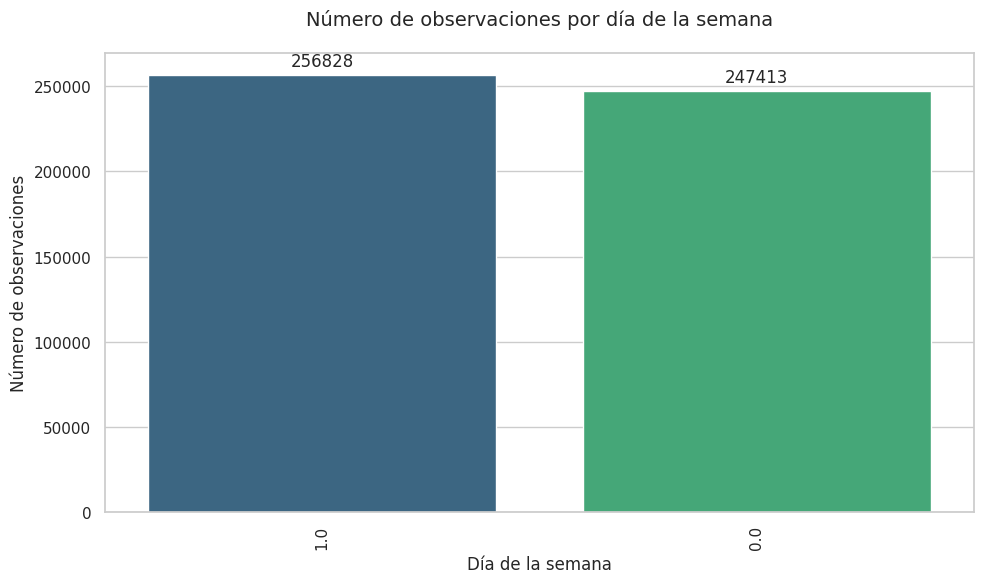

In [ ]:
# Configurar estilo visual (opcional)
sns.set(style="whitegrid")  # Fondo con cuadrícula
plt.figure(figsize=(10, 6))  # Tamaño del gráfico

# Crear gráfico de barras
ax = sns.countplot(
    data=df,
    x="urgenciamed",
    order=df["urgenciamed"].value_counts().index,  # Ordenar por frecuencia
    palette="viridis"  # Colores (puedes cambiar a "rocket", "mako", etc.)
)

# Personalizar ejes y título
plt.title("Número de observaciones por día de la semana", fontsize=14, pad=20)
plt.xlabel("Día de la semana", fontsize=12)
plt.ylabel("Número de observaciones", fontsize=12)

# Añadir etiquetas con los valores exactos
for p in ax.patches:
    ax.annotate(
        f"{int(p.get_height())}",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha="center",
        va="center",
        xytext=(0, 10),
        textcoords="offset points"
    )

# Rotar etiquetas del eje X si son largas (opcional)
plt.xticks(rotation=90)

# Mostrar gráfico
plt.tight_layout()  # Ajustar elementos para evitar cortes
plt.show()

In [ ]:
# Crear DataFrame con los datos
data = {
    "Código": ["002", "003", "004", "005", "006", "007", "008", "009", "010",
               "011", "012", "013", "014", "015", "016", "017"],
    "Alcaldía": ["AZCAPOTZALCO", "COYOACAN", "CUAJIMALPA DE MORELOS",
                "GUSTAVO A. MADERO", "IZTACALCO", "IZTAPALAPA",
                "LA MAGDALENA CONTRERAS", "MILPA ALTA", "ALVARO OBREGON",
                "TLAHUAC", "TLALPAN", "XOCHIMILCO", "BENITO JUAREZ",
                "CUAUHTEMOC", "MIGUEL HIDALGO", "VENUSTIANO CARRANZA"],
    "Población": [432205, 614447, 217686, 1173351, 404695, 1835486,
                 247622, 152685, 759137, 392313, 699928, 442178,
                 434153, 545884, 414470, 443704]
}
dfalc = pd.DataFrame(data)

# Guardar como CSV
dfalc.to_csv("poblacion_alcaldias_cdmx.csv", index=False, encoding='utf-8-sig')

print("Archivo CSV creado exitosamente!")
print(dfalc.head())

Archivo CSV creado exitosamente!
  Código               Alcaldía  Población
0    002           AZCAPOTZALCO     432205
1    003               COYOACAN     614447
2    004  CUAJIMALPA DE MORELOS     217686
3    005      GUSTAVO A. MADERO    1173351
4    006              IZTACALCO     404695


In [ ]:
# Hacer merge usando las columnas 'alcaldia_catalogo' (df) y 'Alcaldía' (dfalc)
df = pd.merge(
    df,
    dfalc[['Alcaldía', 'Población']],  # Seleccionar solo las columnas necesarias
    left_on='alcaldia_cierre',
    right_on='Alcaldía',
    how='left'  # Mantener todas las filas de df aunque no haya coincidencia
)

# Renombrar la columna resultante (opcional)
df.rename(columns={'Población': 'poblacion_alcaldia'}, inplace=True)
df

,folio,fecha_creacion,dia_semana,tipo_incidente_c4,incidente_c4,alcaldia_inicio,codigo_cierre,clas_con_f_alarma,tipo_entrada,alcaldia_cierre,alcaldia_catalogo,colonia_catalogo,longitud,latitud,fecha_hora_creacion,fecha_hora_cierre,urgenciamed,Alcaldía,poblacion_alcaldia
0,C2C/20211229/00212,2021-12-29,Miércoles,Lesionado,Atropellado,NaN,I,URGENCIAS MEDICAS,BOTÓN DE AUXILIO,NaN,Cuauhtémoc,Roma Norte,-99.163670,19.421610,2021-12-29 23:21:20,2022-01-01 00:24:06,1.0,NaN,NaN
1,C2C/20211231/00183,2021-12-31,Viernes,Lesionado,Atropellado,CUAUHTEMOC,A,URGENCIAS MEDICAS,BOTÓN DE AUXILIO,CUAUHTEMOC,Cuauhtémoc,Obrera,-99.144270,19.409910,2021-12-31 23:48:03,2022-01-01 06:29:52,1.0,CUAUHTEMOC,545884.0
2,C2C/20220101/00012,2022-01-01,Sábado,Accidente,Choque con lesionados,CUAUHTEMOC,A,URGENCIAS MEDICAS,BOTÓN DE AUXILIO,CUAUHTEMOC,Cuauhtémoc,Doctores,-99.148320,19.415250,2022-01-01 01:06:39,2022-01-01 06:00:12,1.0,CUAUHTEMOC,545884.0
3,C2C/20220101/00070,2022-01-01,Sábado,Accidente,Motociclista,CUAUHTEMOC,A,URGENCIAS MEDICAS,RADIO,CUAUHTEMOC,Miguel Hidalgo,Tlaxpana,-99.165781,19.443649,2022-01-01 09:51:53,2022-01-01 12:54:10,1.0,CUAUHTEMOC,545884.0
4,C2N/20211231/00128,2021-12-31,Viernes,Accidente,Choque sin lesionados,IZTACALCO,A,EMERGENCIA,BOTÓN DE AUXILIO,IZTACALCO,Iztacalco,Agricola Pantitlan,-99.060450,19.414620,2021-12-31 23:03:05,2022-01-01 06:16:42,0.0,IZTACALCO,404695.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504256,C5/20240229/04009,2024-02-29,Jueves,Accidente,Choque con lesionados,IZTAPALAPA,A,URGENCIAS MEDICAS,LLAMADA DEL 911,IZTAPALAPA,Iztapalapa,El Vergel,-99.087270,19.320600,2024-02-29 19:53:36,2024-02-29 23:16:21,1.0,IZTAPALAPA,1835486.0
504257,C5/20240229/04038,2024-02-29,Jueves,Accidente,Choque con lesionados,CUAUHTEMOC,A,URGENCIAS MEDICAS,RADIO,CUAUHTEMOC,Cuauhtémoc,Centro,-99.125200,19.428723,2024-02-29 20:01:42,2024-02-29 23:06:17,1.0,CUAUHTEMOC,545884.0
504258,C5/20240229/04286,2024-02-29,Jueves,Accidente,Choque con lesionados,IZTAPALAPA,D,URGENCIAS MEDICAS,LLAMADA DEL 911,IZTAPALAPA,Iztapalapa,Apatlaco,-99.119881,19.380011,2024-02-29 20:43:20,2024-02-29 23:46:22,1.0,IZTAPALAPA,1835486.0
504259,C5/20240229/04300,2024-02-29,Jueves,Accidente,Motociclista,IZTAPALAPA,F,URGENCIAS MEDICAS,LLAMADA DEL 911,IZTAPALAPA,Iztapalapa,Guadalupe Del Moral,-99.080981,19.369412,2024-02-29 20:46:18,2024-02-29 23:56:17,1.0,IZTAPALAPA,1835486.0


In [ ]:
# Calcular el centro del mapa
map_center = [df['latitud'].mean(), df['longitud'].mean()]
m = folium.Map(location=map_center, zoom_start=12, tiles='OpenStreetMap')

# Agregar puntos con clustering para mejor rendimiento con muchos datos
marker_cluster = MarkerCluster().add_to(m)

# Añadir marcadores (muestra solo los primeros 1000 puntos por rendimiento)
for idx, row in df.head(1000).iterrows():
    folium.Marker(
        location=[row['latitud'], row['longitud']],
        popup=f"Incidente: {row['incidente_c4']}",
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(marker_cluster)

# Mostrar el mapa
m.save('mapa_incidentes.html')  # Guardar como HTML
m  # Para mostrar en Jupyter Notebook

cc

## Extracción de datos de humedad y precipitación

In [ ]:
# URL del archivo
url = "https://smn.conagua.gob.mx/tools/RESOURCES/Normales_Climatologicas/Diarios/df/dia09048.txt"

# Descargar el contenido
response = requests.get(url)
lines = response.text.split('\n')
start_line = 0
for i, line in enumerate(lines):
    if line.startswith("FECHA"):
        start_line = i + 2  # Saltar la línea de unidades (mm, °C)
        break

# Leer los datos en un DataFrame de pandas
data = []
for line in lines[start_line:]:
    if line.strip():  # Ignorar líneas vacías
        parts = line.split()
        if len(parts) >= 5:  # Asegurarse de que la línea tenga todas las columnas
            fecha = parts[0]
            precip = parts[1] if parts[1] != "NULO" else None  # Manejar valores nulos
            evap = parts[2] if parts[2] != "NULO" else None
            tmax = parts[3] if parts[3] != "NULO" else None
            tmin = parts[4] if parts[4] != "NULO" else None
            data.append([fecha, precip, evap, tmax, tmin])

# Crear DataFrame
df = pd.DataFrame(data, columns=["FECHA", "PRECIP", "EVAP", "TMAX", "TMIN"])

# Convertir columnas numéricas (excepto FECHA)
df["PRECIP"] = pd.to_numeric(df["PRECIP"], errors='coerce')  # 'coerce' convierte "NULO" a NaN
df["EVAP"] = pd.to_numeric(df["EVAP"], errors='coerce')
df["TMAX"] = pd.to_numeric(df["TMAX"], errors='coerce')
df["TMIN"] = pd.to_numeric(df["TMIN"], errors='coerce')

# Convertir FECHA a datetime
df["FECHA"] = pd.to_datetime(df["FECHA"])
df = df[df["FECHA"] >= "2022-01-01"]


# Mostrar las primeras filas
print(df.head())

# Guardar en CSV (opcional)
df.to_csv("datos_climaticos_tacubaya.csv", index=False)


           FECHA  PRECIP  EVAP  TMAX  TMIN
52806 2022-01-01    18.6   NaN  25.5  10.0
52807 2022-01-02     0.0  6.22  25.9   9.5
52808 2022-01-03     0.0  1.90  22.0  10.0
52809 2022-01-04     0.0  0.84  26.1   8.8
52810 2022-01-05     0.0  5.76  25.5   9.4


In [ ]:
# URL del archivo
url = "https://smn.conagua.gob.mx/tools/RESOURCES/Normales_Climatologicas/Diarios/df/dia09010.txt"

# Descargar el contenido
response = requests.get(url)
lines = response.text.split('\n')

# Encontrar la línea donde empiezan los datos (después de los encabezados)
start_line = 0
for i, line in enumerate(lines):
    if line.startswith("FECHA"):
        start_line = i + 2  # Saltar la línea de unidades (mm, °C)
        break

# Leer los datos en un DataFrame de pandas
data = []
for line in lines[start_line:]:
    if line.strip():  # Ignorar líneas vacías
        parts = line.split()
        if len(parts) >= 5:  # Asegurarse de que la línea tenga todas las columnas
            fecha = parts[0]
            precip = parts[1] if parts[1] != "NULO" else None  # Manejar valores nulos
            evap = parts[2] if parts[2] != "NULO" else None
            tmax = parts[3] if parts[3] != "NULO" else None
            tmin = parts[4] if parts[4] != "NULO" else None
            data.append([fecha, precip, evap, tmax, tmin])

# Crear DataFrame
df = pd.DataFrame(data, columns=["FECHA", "PRECIP", "EVAP", "TMAX", "TMIN"])

# Convertir columnas numéricas (excepto FECHA)
df["PRECIP"] = pd.to_numeric(df["PRECIP"], errors='coerce')  # 'coerce' convierte "NULO" a NaN
df["EVAP"] = pd.to_numeric(df["EVAP"], errors='coerce')
df["TMAX"] = pd.to_numeric(df["TMAX"], errors='coerce')
df["TMIN"] = pd.to_numeric(df["TMIN"], errors='coerce')


# Convertir FECHA a datetime
df["FECHA"] = pd.to_datetime(df["FECHA"])
df = df[df["FECHA"] >= "2022-01-01"]

# Mostrar las primeras filas
print(df.head())

# Guardar en CSV (opcional)
df.to_csv("datos_climaticos_america.csv", index=False)

           FECHA  PRECIP  EVAP  TMAX  TMIN
16050 2022-01-01     0.0   NaN  26.0   3.0
16051 2022-01-02     0.0   NaN  23.0   3.0
16052 2022-01-03     0.0   NaN  25.0   3.0
16053 2022-01-04     0.0   NaN  24.0   3.0
16054 2022-01-05     0.0   NaN  24.0   3.0


In [ ]:
# URL del archivo
url = "https://smn.conagua.gob.mx/tools/RESOURCES/Normales_Climatologicas/Diarios/df/dia09036.txt"

# Descargar el contenido
response = requests.get(url)
lines = response.text.split('\n')

# Encontrar la línea donde empiezan los datos (después de los encabezados)
start_line = 0
for i, line in enumerate(lines):
    if line.startswith("FECHA"):
        start_line = i + 2  # Saltar la línea de unidades (mm, °C)
        break

# Leer los datos en un DataFrame de pandas
data = []
for line in lines[start_line:]:
    if line.strip():  # Ignorar líneas vacías
        parts = line.split()
        if len(parts) >= 5:  # Asegurarse de que la línea tenga todas las columnas
            fecha = parts[0]
            precip = parts[1] if parts[1] != "NULO" else None  # Manejar valores nulos
            evap = parts[2] if parts[2] != "NULO" else None
            tmax = parts[3] if parts[3] != "NULO" else None
            tmin = parts[4] if parts[4] != "NULO" else None
            data.append([fecha, precip, evap, tmax, tmin])

# Crear DataFrame
df = pd.DataFrame(data, columns=["FECHA", "PRECIP", "EVAP", "TMAX", "TMIN"])

# Convertir columnas numéricas (excepto FECHA)
df["PRECIP"] = pd.to_numeric(df["PRECIP"], errors='coerce')  # 'coerce' convierte "NULO" a NaN
df["EVAP"] = pd.to_numeric(df["EVAP"], errors='coerce')
df["TMAX"] = pd.to_numeric(df["TMAX"], errors='coerce')
df["TMIN"] = pd.to_numeric(df["TMIN"], errors='coerce')

# Convertir FECHA a datetime
df["FECHA"] = pd.to_datetime(df["FECHA"])
df = df[df["FECHA"] >= "2022-01-01"]

# Mostrar las primeras filas
print(df.head())

# Guardar en CSV (opcional)
df.to_csv("datos_climaticos_iztacalco.csv", index=False)

           FECHA  PRECIP  EVAP  TMAX  TMIN
19191 2022-01-01     0.0   NaN  23.0   7.0
19192 2022-01-02     0.0   NaN  23.0   7.0
19193 2022-01-03     0.0   NaN  24.0   7.0
19194 2022-01-04     0.0   NaN  25.0   8.0
19195 2022-01-05     0.0   NaN  22.0   9.0


In [ ]:
# URL del archivo
url = "https://smn.conagua.gob.mx/tools/RESOURCES/Normales_Climatologicas/Diarios/df/dia09014.txt"

# Descargar el contenido
response = requests.get(url)
lines = response.text.split('\n')

# Encontrar la línea donde empiezan los datos (después de los encabezados)
start_line = 0
for i, line in enumerate(lines):
    if line.startswith("FECHA"):
        start_line = i + 2  # Saltar la línea de unidades (mm, °C)
        break

# Leer los datos en un DataFrame de pandas
data = []
for line in lines[start_line:]:
    if line.strip():  # Ignorar líneas vacías
        parts = line.split()
        if len(parts) >= 5:  # Asegurarse de que la línea tenga todas las columnas
            fecha = parts[0]
            precip = parts[1] if parts[1] != "NULO" else None  # Manejar valores nulos
            evap = parts[2] if parts[2] != "NULO" else None
            tmax = parts[3] if parts[3] != "NULO" else None
            tmin = parts[4] if parts[4] != "NULO" else None
            data.append([fecha, precip, evap, tmax, tmin])

# Crear DataFrame
df = pd.DataFrame(data, columns=["FECHA", "PRECIP", "EVAP", "TMAX", "TMIN"])

# Convertir columnas numéricas (excepto FECHA)
df["PRECIP"] = pd.to_numeric(df["PRECIP"], errors='coerce')  # 'coerce' convierte "NULO" a NaN
df["EVAP"] = pd.to_numeric(df["EVAP"], errors='coerce')
df["TMAX"] = pd.to_numeric(df["TMAX"], errors='coerce')
df["TMIN"] = pd.to_numeric(df["TMIN"], errors='coerce')

# Convertir FECHA a datetime
df["FECHA"] = pd.to_datetime(df["FECHA"])
df = df[df["FECHA"] >= "2022-01-01"]

# Mostrar las primeras filas
print(df.head())

# Guardar en CSV (opcional)
df.to_csv("datos_climaticos_santaursula.csv", index=False)

           FECHA  PRECIP  EVAP  TMAX  TMIN
18048 2022-01-01     0.0   NaN  23.0   7.0
18049 2022-01-02     0.0   NaN  23.0   6.5
18050 2022-01-03     0.0   NaN  21.0   6.0
18051 2022-01-04     0.0   NaN  23.0   7.0
18052 2022-01-05     0.0   NaN  21.5   6.0


In [ ]:
# URL del archivo
url = "https://smn.conagua.gob.mx/tools/RESOURCES/Normales_Climatologicas/Diarios/df/dia09071.txt"

# Descargar el contenido
response = requests.get(url)
lines = response.text.split('\n')

# Encontrar la línea donde empiezan los datos (después de los encabezados)
start_line = 0
for i, line in enumerate(lines):
    if line.startswith("FECHA"):
        start_line = i + 2  # Saltar la línea de unidades (mm, °C)
        break

# Leer los datos en un DataFrame de pandas
data = []
for line in lines[start_line:]:
    if line.strip():  # Ignorar líneas vacías
        parts = line.split()
        if len(parts) >= 5:  # Asegurarse de que la línea tenga todas las columnas
            fecha = parts[0]
            precip = parts[1] if parts[1] != "NULO" else None  # Manejar valores nulos
            evap = parts[2] if parts[2] != "NULO" else None
            tmax = parts[3] if parts[3] != "NULO" else None
            tmin = parts[4] if parts[4] != "NULO" else None
            data.append([fecha, precip, evap, tmax, tmin])

# Crear DataFrame
df = pd.DataFrame(data, columns=["FECHA", "PRECIP", "EVAP", "TMAX", "TMIN"])

# Convertir columnas numéricas (excepto FECHA)
df["PRECIP"] = pd.to_numeric(df["PRECIP"], errors='coerce')  # 'coerce' convierte "NULO" a NaN
df["EVAP"] = pd.to_numeric(df["EVAP"], errors='coerce')
df["TMAX"] = pd.to_numeric(df["TMAX"], errors='coerce')
df["TMIN"] = pd.to_numeric(df["TMIN"], errors='coerce')

# Convertir FECHA a datetime
df["FECHA"] = pd.to_datetime(df["FECHA"])
df = df[df["FECHA"] >= "2022-01-01"]

# Mostrar las primeras filas
print(df.head())

# Guardar en CSV (opcional)
df.to_csv("datos_climaticos_coyoacan.csv", index=False)

           FECHA  PRECIP  EVAP  TMAX  TMIN
14176 2022-01-01     0.0   NaN  26.0   7.0
14177 2022-01-02     0.0   NaN  26.0   7.0
14178 2022-01-03     0.0   NaN  25.0   7.0
14179 2022-01-04     0.0   NaN  25.0   8.0
14180 2022-01-05     0.0   NaN  24.0   8.0


In [ ]:
# URL del archivo
url = "https://smn.conagua.gob.mx/tools/RESOURCES/Normales_Climatologicas/Diarios/df/dia09043.txt"

# Descargar el contenido
response = requests.get(url)
lines = response.text.split('\n')

# Encontrar la línea donde empiezan los datos (después de los encabezados)
start_line = 0
for i, line in enumerate(lines):
    if line.startswith("FECHA"):
        start_line = i + 2  # Saltar la línea de unidades (mm, °C)
        break

# Leer los datos en un DataFrame de pandas
data = []
for line in lines[start_line:]:
    if line.strip():  # Ignorar líneas vacías
        parts = line.split()
        if len(parts) >= 5:  # Asegurarse de que la línea tenga todas las columnas
            fecha = parts[0]
            precip = parts[1] if parts[1] != "NULO" else None  # Manejar valores nulos
            evap = parts[2] if parts[2] != "NULO" else None
            tmax = parts[3] if parts[3] != "NULO" else None
            tmin = parts[4] if parts[4] != "NULO" else None
            data.append([fecha, precip, evap, tmax, tmin])

# Crear DataFrame
df = pd.DataFrame(data, columns=["FECHA", "PRECIP", "EVAP", "TMAX", "TMIN"])

# Convertir columnas numéricas (excepto FECHA)
df["PRECIP"] = pd.to_numeric(df["PRECIP"], errors='coerce')  # 'coerce' convierte "NULO" a NaN
df["EVAP"] = pd.to_numeric(df["EVAP"], errors='coerce')
df["TMAX"] = pd.to_numeric(df["TMAX"], errors='coerce')
df["TMIN"] = pd.to_numeric(df["TMIN"], errors='coerce')

# Convertir FECHA a datetime
df["FECHA"] = pd.to_datetime(df["FECHA"])
df = df[df["FECHA"] >= "2022-01-01"]

# Mostrar las primeras filas
print(df.head())

# Guardar en CSV (opcional)
df.to_csv("datos_climaticos_gam.csv", index=False)

           FECHA  PRECIP  EVAP  TMAX  TMIN
24888 2022-01-01     0.0  2.68  26.0   6.0
24889 2022-01-02     0.0  3.00  27.0   5.0
24890 2022-01-03     0.0  1.72  23.0   9.0
24891 2022-01-04     0.0  2.70  27.0   5.5
24892 2022-01-05     0.0  1.10  27.5   7.0


In [ ]:
# URL del archivo
url = "https://smn.conagua.gob.mx/tools/RESOURCES/Normales_Climatologicas/Diarios/mex/dia15058.txt"

# Descargar el contenido
response = requests.get(url)
lines = response.text.split('\n')

# Encontrar la línea donde empiezan los datos (después de los encabezados)
start_line = 0
for i, line in enumerate(lines):
    if line.startswith("FECHA"):
        start_line = i + 2  # Saltar la línea de unidades (mm, °C)
        break

# Leer los datos en un DataFrame de pandas
data = []
for line in lines[start_line:]:
    if line.strip():  # Ignorar líneas vacías
        parts = line.split()
        if len(parts) >= 5:  # Asegurarse de que la línea tenga todas las columnas
            fecha = parts[0]
            precip = parts[1] if parts[1] != "NULO" else None  # Manejar valores nulos
            evap = parts[2] if parts[2] != "NULO" else None
            tmax = parts[3] if parts[3] != "NULO" else None
            tmin = parts[4] if parts[4] != "NULO" else None
            data.append([fecha, precip, evap, tmax, tmin])

# Crear DataFrame
df = pd.DataFrame(data, columns=["FECHA", "PRECIP", "EVAP", "TMAX", "TMIN"])

# Convertir columnas numéricas (excepto FECHA)
df["PRECIP"] = pd.to_numeric(df["PRECIP"], errors='coerce')  # 'coerce' convierte "NULO" a NaN
df["EVAP"] = pd.to_numeric(df["EVAP"], errors='coerce')
df["TMAX"] = pd.to_numeric(df["TMAX"], errors='coerce')
df["TMIN"] = pd.to_numeric(df["TMIN"], errors='coerce')

# Convertir FECHA a datetime
df["FECHA"] = pd.to_datetime(df["FECHA"])
df = df[df["FECHA"] >= "2022-01-01"]

# Mostrar las primeras filas
print(df.head())

# Guardar en CSV (opcional)
df.to_csv("datos_climaticos_naucalpan.csv", index=False)

           FECHA  PRECIP  EVAP  TMAX  TMIN
19035 2022-01-01     0.0  3.45  29.0   0.0
19036 2022-01-02     0.0  4.90  28.0   0.0
19037 2022-01-03     0.0  2.11  27.0   0.0
19038 2022-01-04     0.0  2.53  26.0   0.0
19039 2022-01-05     0.0  4.48  25.0   0.0


In [ ]:
# URL del archivo
url = "https://smn.conagua.gob.mx/tools/RESOURCES/Normales_Climatologicas/Diarios/df/dia09020.txt"

# Descargar el contenido
response = requests.get(url)
lines = response.text.split('\n')

# Encontrar la línea donde empiezan los datos (después de los encabezados)
start_line = 0
for i, line in enumerate(lines):
    if line.startswith("FECHA"):
        start_line = i + 2  # Saltar la línea de unidades (mm, °C)
        break

# Leer los datos en un DataFrame de pandas
data = []
for line in lines[start_line:]:
    if line.strip():  # Ignorar líneas vacías
        parts = line.split()
        if len(parts) >= 5:  # Asegurarse de que la línea tenga todas las columnas
            fecha = parts[0]
            precip = parts[1] if parts[1] != "NULO" else None  # Manejar valores nulos
            evap = parts[2] if parts[2] != "NULO" else None
            tmax = parts[3] if parts[3] != "NULO" else None
            tmin = parts[4] if parts[4] != "NULO" else None
            data.append([fecha, precip, evap, tmax, tmin])

# Crear DataFrame
df = pd.DataFrame(data, columns=["FECHA", "PRECIP", "EVAP", "TMAX", "TMIN"])

# Convertir columnas numéricas (excepto FECHA)
df["PRECIP"] = pd.to_numeric(df["PRECIP"], errors='coerce')  # 'coerce' convierte "NULO" a NaN
df["EVAP"] = pd.to_numeric(df["EVAP"], errors='coerce')
df["TMAX"] = pd.to_numeric(df["TMAX"], errors='coerce')
df["TMIN"] = pd.to_numeric(df["TMIN"], errors='coerce')

# Convertir FECHA a datetime
df["FECHA"] = pd.to_datetime(df["FECHA"])
df = df[df["FECHA"] >= "2022-01-01"]

# Mostrar las primeras filas
print(df.head())

# Guardar en CSV (opcional)
df.to_csv("datos_climaticos_pedregal.csv", index=False)

           FECHA  PRECIP  EVAP  TMAX  TMIN
24940 2022-01-01     0.0   3.1  24.0   9.0
24941 2022-01-02     0.0   2.5  23.0  10.0
24942 2022-01-03     0.0   3.1  24.0   9.0
24943 2022-01-04     0.0   2.6  23.0  10.0
24944 2022-01-05     0.0   3.1  24.0  10.0


In [ ]:
# URL del archivo
url = "https://smn.conagua.gob.mx/tools/RESOURCES/Normales_Climatologicas/Diarios/df/dia09004.txt"

# Descargar el contenido
response = requests.get(url)
lines = response.text.split('\n')

# Encontrar la línea donde empiezan los datos (después de los encabezados)
start_line = 0
for i, line in enumerate(lines):
    if line.startswith("FECHA"):
        start_line = i + 2  # Saltar la línea de unidades (mm, °C)
        break

# Leer los datos en un DataFrame de pandas
data = []
for line in lines[start_line:]:
    if line.strip():  # Ignorar líneas vacías
        parts = line.split()
        if len(parts) >= 5:  # Asegurarse de que la línea tenga todas las columnas
            fecha = parts[0]
            precip = parts[1] if parts[1] != "NULO" else None  # Manejar valores nulos
            evap = parts[2] if parts[2] != "NULO" else None
            tmax = parts[3] if parts[3] != "NULO" else None
            tmin = parts[4] if parts[4] != "NULO" else None
            data.append([fecha, precip, evap, tmax, tmin])

# Crear DataFrame
df = pd.DataFrame(data, columns=["FECHA", "PRECIP", "EVAP", "TMAX", "TMIN"])

# Convertir columnas numéricas (excepto FECHA)
df["PRECIP"] = pd.to_numeric(df["PRECIP"], errors='coerce')  # 'coerce' convierte "NULO" a NaN
df["EVAP"] = pd.to_numeric(df["EVAP"], errors='coerce')
df["TMAX"] = pd.to_numeric(df["TMAX"], errors='coerce')
df["TMIN"] = pd.to_numeric(df["TMIN"], errors='coerce')

# Convertir FECHA a datetime
df["FECHA"] = pd.to_datetime(df["FECHA"])
df = df[df["FECHA"] >= "2022-01-01"]

# Mostrar las primeras filas
print(df.head())

# Guardar en CSV (opcional)
df.to_csv("datos_climaticos_tlalpan.csv", index=False)

           FECHA  PRECIP  EVAP  TMAX  TMIN
18332 2022-01-01     0.0   NaN  25.0   9.0
18333 2022-01-02    10.0   NaN  22.0   9.0
18334 2022-01-03     0.0   NaN  23.0  10.0
18335 2022-01-04     0.0   NaN  25.0   9.0
18336 2022-01-05     0.0   NaN  26.0   8.0


In [ ]:
# URL del archivo
url = "https://smn.conagua.gob.mx/tools/RESOURCES/Normales_Climatologicas/Diarios/df/dia09051.txt"

# Descargar el contenido
response = requests.get(url)
lines = response.text.split('\n')

# Encontrar la línea donde empiezan los datos (después de los encabezados)
start_line = 0
for i, line in enumerate(lines):
    if line.startswith("FECHA"):
        start_line = i + 2  # Saltar la línea de unidades (mm, °C)
        break

# Leer los datos en un DataFrame de pandas
data = []
for line in lines[start_line:]:
    if line.strip():  # Ignorar líneas vacías
        parts = line.split()
        if len(parts) >= 5:  # Asegurarse de que la línea tenga todas las columnas
            fecha = parts[0]
            precip = parts[1] if parts[1] != "NULO" else None  # Manejar valores nulos
            evap = parts[2] if parts[2] != "NULO" else None
            tmax = parts[3] if parts[3] != "NULO" else None
            tmin = parts[4] if parts[4] != "NULO" else None
            data.append([fecha, precip, evap, tmax, tmin])

# Crear DataFrame
df = pd.DataFrame(data, columns=["FECHA", "PRECIP", "EVAP", "TMAX", "TMIN"])

# Convertir columnas numéricas (excepto FECHA)
df["PRECIP"] = pd.to_numeric(df["PRECIP"], errors='coerce')  # 'coerce' convierte "NULO" a NaN
df["EVAP"] = pd.to_numeric(df["EVAP"], errors='coerce')
df["TMAX"] = pd.to_numeric(df["TMAX"], errors='coerce')
df["TMIN"] = pd.to_numeric(df["TMIN"], errors='coerce')

# Convertir FECHA a datetime
df["FECHA"] = pd.to_datetime(df["FECHA"])
df = df[df["FECHA"] >= "2022-01-01"]

# Mostrar las primeras filas
print(df.head())

# Guardar en CSV (opcional)
df.to_csv("datos_climaticos_tlahuac.csv", index=False)

           FECHA  PRECIP  EVAP  TMAX  TMIN
19081 2022-01-01     0.0  1.81  10.0   5.0
19082 2022-01-02     0.0  0.23  14.0   2.0
19083 2022-01-03     0.0  1.26  12.0  10.0
19084 2022-01-04     0.0  1.51  10.0   5.0
19085 2022-01-05     0.0  0.13  10.0   2.0


In [ ]:
# URL del archivo
url = "https://smn.conagua.gob.mx/tools/RESOURCES/Normales_Climatologicas/Diarios/df/dia09029.txt"

# Descargar el contenido
response = requests.get(url)
lines = response.text.split('\n')

# Encontrar la línea donde empiezan los datos (después de los encabezados)
start_line = 0
for i, line in enumerate(lines):
    if line.startswith("FECHA"):
        start_line = i + 2  # Saltar la línea de unidades (mm, °C)
        break

# Leer los datos en un DataFrame de pandas
data = []
for line in lines[start_line:]:
    if line.strip():  # Ignorar líneas vacías
        parts = line.split()
        if len(parts) >= 5:  # Asegurarse de que la línea tenga todas las columnas
            fecha = parts[0]
            precip = parts[1] if parts[1] != "NULO" else None  # Manejar valores nulos
            evap = parts[2] if parts[2] != "NULO" else None
            tmax = parts[3] if parts[3] != "NULO" else None
            tmin = parts[4] if parts[4] != "NULO" else None
            data.append([fecha, precip, evap, tmax, tmin])

# Crear DataFrame
df = pd.DataFrame(data, columns=["FECHA", "PRECIP", "EVAP", "TMAX", "TMIN"])

# Convertir columnas numéricas (excepto FECHA)
df["PRECIP"] = pd.to_numeric(df["PRECIP"], errors='coerce')  # 'coerce' convierte "NULO" a NaN
df["EVAP"] = pd.to_numeric(df["EVAP"], errors='coerce')
df["TMAX"] = pd.to_numeric(df["TMAX"], errors='coerce')
df["TMIN"] = pd.to_numeric(df["TMIN"], errors='coerce')

# Convertir FECHA a datetime
df["FECHA"] = pd.to_datetime(df["FECHA"])
df = df[df["FECHA"] >= "2022-01-01"]

# Mostrar las primeras filas
print(df.head())

# Guardar en CSV (opcional)
df.to_csv("datos_climaticos_grancanal.csv", index=False)

           FECHA  PRECIP   EVAP  TMAX  TMIN
25212 2022-01-01     0.0   2.60  25.0   4.0
25213 2022-01-02     0.0  17.50  24.0   4.0
25214 2022-01-03     0.0   0.75  21.0   4.0
25215 2022-01-04     0.0   2.55  24.0   4.0
25216 2022-01-05     0.0   3.22  26.0   4.0


In [ ]:
# URL del archivo
url = "https://smn.conagua.gob.mx/tools/RESOURCES/Normales_Climatologicas/Diarios/df/dia09068.txt"

# Descargar el contenido
response = requests.get(url)
lines = response.text.split('\n')

# Encontrar la línea donde empiezan los datos (después de los encabezados)
start_line = 0
for i, line in enumerate(lines):
    if line.startswith("FECHA"):
        start_line = i + 2  # Saltar la línea de unidades (mm, °C)
        break

# Leer los datos en un DataFrame de pandas
data = []
for line in lines[start_line:]:
    if line.strip():  # Ignorar líneas vacías
        parts = line.split()
        if len(parts) >= 5:  # Asegurarse de que la línea tenga todas las columnas
            fecha = parts[0]
            precip = parts[1] if parts[1] != "NULO" else None  # Manejar valores nulos
            evap = parts[2] if parts[2] != "NULO" else None
            tmax = parts[3] if parts[3] != "NULO" else None
            tmin = parts[4] if parts[4] != "NULO" else None
            data.append([fecha, precip, evap, tmax, tmin])

# Crear DataFrame
df = pd.DataFrame(data, columns=["FECHA", "PRECIP", "EVAP", "TMAX", "TMIN"])

# Convertir columnas numéricas (excepto FECHA)
df["PRECIP"] = pd.to_numeric(df["PRECIP"], errors='coerce')  # 'coerce' convierte "NULO" a NaN
df["EVAP"] = pd.to_numeric(df["EVAP"], errors='coerce')
df["TMAX"] = pd.to_numeric(df["TMAX"], errors='coerce')
df["TMIN"] = pd.to_numeric(df["TMIN"], errors='coerce')

# Convertir FECHA a datetime
df["FECHA"] = pd.to_datetime(df["FECHA"])
df = df[df["FECHA"] >= "2022-01-01"]

# Mostrar las primeras filas
print(df.head())

# Guardar en CSV (opcional)
df.to_csv("datos_climaticos_cuahutemoc.csv", index=False)

           FECHA  PRECIP  EVAP  TMAX  TMIN
16082 2022-01-01     0.0   NaN  24.5   3.0
16083 2022-01-02     0.0   NaN  21.0   2.0
16084 2022-01-03     0.0   NaN  21.5   4.0
16085 2022-01-04     0.0   NaN  21.0   2.0
16086 2022-01-05     0.0   NaN  15.0   3.0


In [ ]:
# URL del archivo
url = "https://smn.conagua.gob.mx/tools/RESOURCES/Normales_Climatologicas/Diarios/df/dia09032.txt"

# Descargar el contenido
response = requests.get(url)
lines = response.text.split('\n')

# Encontrar la línea donde empiezan los datos (después de los encabezados)
start_line = 0
for i, line in enumerate(lines):
    if line.startswith("FECHA"):
        start_line = i + 2  # Saltar la línea de unidades (mm, °C)
        break

# Leer los datos en un DataFrame de pandas
data = []
for line in lines[start_line:]:
    if line.strip():  # Ignorar líneas vacías
        parts = line.split()
        if len(parts) >= 5:  # Asegurarse de que la línea tenga todas las columnas
            fecha = parts[0]
            precip = parts[1] if parts[1] != "NULO" else None  # Manejar valores nulos
            evap = parts[2] if parts[2] != "NULO" else None
            tmax = parts[3] if parts[3] != "NULO" else None
            tmin = parts[4] if parts[4] != "NULO" else None
            data.append([fecha, precip, evap, tmax, tmin])

# Crear DataFrame
df = pd.DataFrame(data, columns=["FECHA", "PRECIP", "EVAP", "TMAX", "TMIN"])

# Convertir columnas numéricas (excepto FECHA)
df["PRECIP"] = pd.to_numeric(df["PRECIP"], errors='coerce')  # 'coerce' convierte "NULO" a NaN
df["EVAP"] = pd.to_numeric(df["EVAP"], errors='coerce')
df["TMAX"] = pd.to_numeric(df["TMAX"], errors='coerce')
df["TMIN"] = pd.to_numeric(df["TMIN"], errors='coerce')

# Convertir FECHA a datetime
df["FECHA"] = pd.to_datetime(df["FECHA"])
df = df[df["FECHA"] >= "2022-01-01"]

# Mostrar las primeras filas
print(df.head())

# Guardar en CSV (opcional)
df.to_csv("datos_climaticos_milpaalta.csv", index=False)

           FECHA  PRECIP  EVAP  TMAX  TMIN
25792 2022-01-01     0.0   NaN  17.0   3.0
25793 2022-01-02     0.0   NaN  17.0   3.0
25794 2022-01-03     0.0   NaN  17.0   3.0
25795 2022-01-04     0.0   NaN  17.0   3.0
25796 2022-01-05     0.0   NaN  16.0   3.0


## Extracción de datos de Metrobús


In [ ]:
# Leer el archivo CSV
df_metrobus = pd.read_csv('/content/afluenciamb_simple_03_2025.csv')
# Opción 1: Capitalizar y corregir la tilde (recomendado)
df_metrobus['linea'] = df_metrobus['linea'].str.replace('linea', 'Línea', case=False)

# Opción 2: Si hay otras variaciones (ej. "LINEA 1", "Linea 2"), normalizar todo
df_metrobus['linea'] = (
    df_metrobus['linea'].str.lower()           # Convertir todo a minúscula
               .str.replace('linea', 'Línea')  # Reemplazar 'linea' por 'Línea'
)

# Pivotar el DataFrame para tener columnas por línea
df_pivoted = df_metrobus.pivot(index=['fecha', 'anio', 'mes'], columns='linea', values='afluencia')

# Resetear el índice para convertir las columnas de índice en columnas normales
df_pivoted = df_pivoted.reset_index()
# Suponiendo que ya tienes tu DataFrame df_pivoted

# Renombrar las columnas para quitar el nombre 'linea' del multiíndice
df_pivoted.columns.name = None

df_pivoted['fecha'] = pd.to_datetime(df_pivoted['fecha'])
df_pivoted = df_pivoted[df_pivoted["fecha"] >= "2022-01-01"]

# Mostrar el resultado
df_pivoted

,fecha,anio,mes,línea 1,línea 2,línea 3,línea 4,línea 5,línea 6,línea 7
6003,2022-01-01,2022,Enero,80808.0,44817.0,43627.0,22813.0,69499.0,51922.0,51098.0
6004,2022-01-02,2022,Enero,119205.0,64174.0,64012.0,44968.0,100925.0,66220.0,71395.0
6005,2022-01-03,2022,Enero,286386.0,138192.0,119252.0,78351.0,178251.0,132523.0,118881.0
6006,2022-01-04,2022,Enero,306844.0,148804.0,126552.0,78763.0,189064.0,147068.0,122574.0
6007,2022-01-05,2022,Enero,313958.0,147356.0,133076.0,71695.0,191854.0,150685.0,124660.0
...,...,...,...,...,...,...,...,...,...,...
7184,2025-03-27,2025,Marzo,506029.0,232203.0,206659.0,106505.0,298929.0,215773.0,170185.0
7185,2025-03-28,2025,Marzo,522377.0,237966.0,201094.0,111985.0,268636.0,198952.0,166328.0
7186,2025-03-29,2025,Marzo,359219.0,156967.0,143114.0,97642.0,183537.0,135681.0,108347.0
7187,2025-03-30,2025,Marzo,227083.0,105315.0,103119.0,52642.0,157095.0,96057.0,65197.0


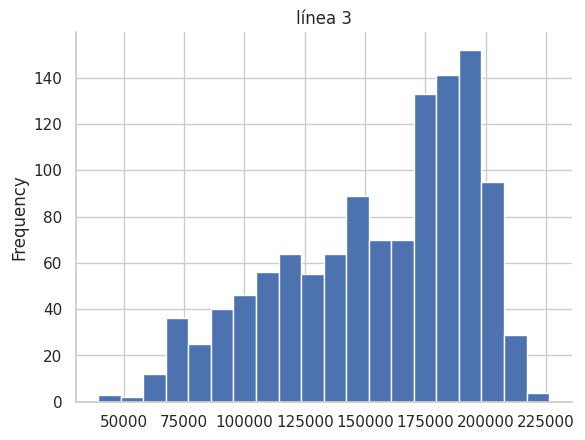

In [ ]:
from matplotlib import pyplot as plt
df_pivoted['línea 3'].plot(kind='hist', bins=20, title='línea 3')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# 1. Información general del dataframe
print("\nInformación general del dataframe:")
df_pivoted['fecha'] = pd.to_datetime(df_pivoted['fecha'])
df_pivoted = df_pivoted[df_pivoted["fecha"] >= "2022-01-01"]
df_pivoted


Información general del dataframe:


,fecha,anio,mes,línea 1,línea 2,línea 3,línea 4,línea 5,línea 6,línea 7
6003,2022-01-01,2022,Enero,80808.0,44817.0,43627.0,22813.0,69499.0,51922.0,51098.0
6004,2022-01-02,2022,Enero,119205.0,64174.0,64012.0,44968.0,100925.0,66220.0,71395.0
6005,2022-01-03,2022,Enero,286386.0,138192.0,119252.0,78351.0,178251.0,132523.0,118881.0
6006,2022-01-04,2022,Enero,306844.0,148804.0,126552.0,78763.0,189064.0,147068.0,122574.0
6007,2022-01-05,2022,Enero,313958.0,147356.0,133076.0,71695.0,191854.0,150685.0,124660.0
...,...,...,...,...,...,...,...,...,...,...
7184,2025-03-27,2025,Marzo,506029.0,232203.0,206659.0,106505.0,298929.0,215773.0,170185.0
7185,2025-03-28,2025,Marzo,522377.0,237966.0,201094.0,111985.0,268636.0,198952.0,166328.0
7186,2025-03-29,2025,Marzo,359219.0,156967.0,143114.0,97642.0,183537.0,135681.0,108347.0
7187,2025-03-30,2025,Marzo,227083.0,105315.0,103119.0,52642.0,157095.0,96057.0,65197.0


In [ ]:
print("\nInformación general del dataframe:")
print(df_pivoted.info())


Información general del dataframe:
<class 'pandas.core.frame.DataFrame'>
Index: 1186 entries, 6003 to 7188
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   fecha    1186 non-null   datetime64[ns]
 1   anio     1186 non-null   int64         
 2   mes      1186 non-null   object        
 3   línea 1  1186 non-null   float64       
 4   línea 2  1186 non-null   float64       
 5   línea 3  1186 non-null   float64       
 6   línea 4  1186 non-null   float64       
 7   línea 5  1186 non-null   float64       
 8   línea 6  1186 non-null   float64       
 9   línea 7  1186 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 101.9+ KB
None


In [ ]:

# Unir con df
df = pd.merge(
    df,
    df_pivoted,
    left_on='fecha_creacion',
    right_on='fecha',
    how='left'
)

In [ ]:
print("\nInformación general del dataframe:")
print(df.info())


Información general del dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504261 entries, 0 to 504260
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   folio                504261 non-null  object        
 1   fecha_creacion       504261 non-null  datetime64[ns]
 2   dia_semana           504261 non-null  category      
 3   tipo_incidente_c4    504261 non-null  category      
 4   incidente_c4         504261 non-null  category      
 5   alcaldia_inicio      504226 non-null  category      
 6   codigo_cierre        504261 non-null  object        
 7   clas_con_f_alarma    504261 non-null  category      
 8   tipo_entrada         504256 non-null  category      
 9   alcaldia_cierre      504226 non-null  object        
 10  alcaldia_catalogo    503707 non-null  category      
 11  colonia_catalogo     493085 non-null  category      
 12  longitud             504261 non-null

In [ ]:
df

,folio,fecha_creacion,dia_semana,tipo_incidente_c4,incidente_c4,alcaldia_inicio,codigo_cierre,clas_con_f_alarma,tipo_entrada,alcaldia_cierre,...,fecha,anio,mes,línea 1,línea 2,línea 3,línea 4,línea 5,línea 6,línea 7
0,C2C/20211229/00212,2021-12-29,Miércoles,Lesionado,Atropellado,NaN,I,URGENCIAS MEDICAS,BOTÓN DE AUXILIO,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C2C/20211231/00183,2021-12-31,Viernes,Lesionado,Atropellado,CUAUHTEMOC,A,URGENCIAS MEDICAS,BOTÓN DE AUXILIO,CUAUHTEMOC,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C2C/20220101/00012,2022-01-01,Sábado,Accidente,Choque con lesionados,CUAUHTEMOC,A,URGENCIAS MEDICAS,BOTÓN DE AUXILIO,CUAUHTEMOC,...,2022-01-01,2022.0,Enero,80808.0,44817.0,43627.0,22813.0,69499.0,51922.0,51098.0
3,C2C/20220101/00070,2022-01-01,Sábado,Accidente,Motociclista,CUAUHTEMOC,A,URGENCIAS MEDICAS,RADIO,CUAUHTEMOC,...,2022-01-01,2022.0,Enero,80808.0,44817.0,43627.0,22813.0,69499.0,51922.0,51098.0
4,C2N/20211231/00128,2021-12-31,Viernes,Accidente,Choque sin lesionados,IZTACALCO,A,EMERGENCIA,BOTÓN DE AUXILIO,IZTACALCO,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504256,C5/20240229/04009,2024-02-29,Jueves,Accidente,Choque con lesionados,IZTAPALAPA,A,URGENCIAS MEDICAS,LLAMADA DEL 911,IZTAPALAPA,...,2024-02-29,2024.0,Febrero,516559.0,268021.0,202430.0,112118.0,277059.0,213424.0,173906.0
504257,C5/20240229/04038,2024-02-29,Jueves,Accidente,Choque con lesionados,CUAUHTEMOC,A,URGENCIAS MEDICAS,RADIO,CUAUHTEMOC,...,2024-02-29,2024.0,Febrero,516559.0,268021.0,202430.0,112118.0,277059.0,213424.0,173906.0
504258,C5/20240229/04286,2024-02-29,Jueves,Accidente,Choque con lesionados,IZTAPALAPA,D,URGENCIAS MEDICAS,LLAMADA DEL 911,IZTAPALAPA,...,2024-02-29,2024.0,Febrero,516559.0,268021.0,202430.0,112118.0,277059.0,213424.0,173906.0
504259,C5/20240229/04300,2024-02-29,Jueves,Accidente,Motociclista,IZTAPALAPA,F,URGENCIAS MEDICAS,LLAMADA DEL 911,IZTAPALAPA,...,2024-02-29,2024.0,Febrero,516559.0,268021.0,202430.0,112118.0,277059.0,213424.0,173906.0


# Extración datos de precipitación

In [ ]:
# Cargar el CSV en un DataFrame
df_climaticos_cuahutemoc = pd.read_csv('datos_climaticos_cuahutemoc.csv')
df_climaticos_cuahutemoc['FECHA'] = pd.to_datetime(df_climaticos_cuahutemoc['FECHA'])
df_climaticos_cuahutemoc['PRECIPcuahutemoc'] = df_climaticos_cuahutemoc['PRECIP']
print(df_climaticos_cuahutemoc.head())

       FECHA  PRECIP  EVAP  TMAX  TMIN  PRECIPcuahutemoc
0 2022-01-01     0.0   NaN  24.5   3.0               0.0
1 2022-01-02     0.0   NaN  21.0   2.0               0.0
2 2022-01-03     0.0   NaN  21.5   4.0               0.0
3 2022-01-04     0.0   NaN  21.0   2.0               0.0
4 2022-01-05     0.0   NaN  15.0   3.0               0.0


In [ ]:
print("\nInformación general del dataframe:")
print(df_climaticos_cuahutemoc.info())


Información general del dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   FECHA             850 non-null    datetime64[ns]
 1   PRECIP            850 non-null    float64       
 2   EVAP              0 non-null      float64       
 3   TMAX              850 non-null    float64       
 4   TMIN              850 non-null    float64       
 5   PRECIPcuahutemoc  850 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 40.0 KB
None


In [ ]:
# Cargar el CSV en un DataFrame
df_climaticos_gam = pd.read_csv('datos_climaticos_gam.csv')
df_climaticos_gam['FECHA'] = pd.to_datetime(df_climaticos_gam['FECHA'])
df_climaticos_gam['PRECIPgam'] = df_climaticos_gam['PRECIP']
print(df_climaticos_gam.head())

       FECHA  PRECIP  EVAP  TMAX  TMIN  PRECIPgam
0 2022-01-01     0.0  2.68  26.0   6.0        0.0
1 2022-01-02     0.0  3.00  27.0   5.0        0.0
2 2022-01-03     0.0  1.72  23.0   9.0        0.0
3 2022-01-04     0.0  2.70  27.0   5.5        0.0
4 2022-01-05     0.0  1.10  27.5   7.0        0.0


In [ ]:
df_climaticos_tacubaya = pd.read_csv('datos_climaticos_tacubaya.csv')
df_climaticos_tacubaya['FECHA'] = pd.to_datetime(df_climaticos_tacubaya['FECHA'])
df_climaticos_tacubaya['PRECIPtacubaya'] = df_climaticos_tacubaya['PRECIP']
print(df_climaticos_tacubaya.head())

       FECHA  PRECIP  EVAP  TMAX  TMIN  PRECIPtacubaya
0 2022-01-01    18.6   NaN  25.5  10.0            18.6
1 2022-01-02     0.0  6.22  25.9   9.5             0.0
2 2022-01-03     0.0  1.90  22.0  10.0             0.0
3 2022-01-04     0.0  0.84  26.1   8.8             0.0
4 2022-01-05     0.0  5.76  25.5   9.4             0.0


In [ ]:
df_climaticos_tlalpan = pd.read_csv('datos_climaticos_tlalpan.csv')
df_climaticos_tlalpan['FECHA'] = pd.to_datetime(df_climaticos_tlalpan['FECHA'])
df_climaticos_tlalpan['PRECIPTlalpan'] = df_climaticos_tlalpan['PRECIP']
print(df_climaticos_tlalpan.head())

       FECHA  PRECIP  EVAP  TMAX  TMIN  PRECIPTlalpan
0 2022-01-01     0.0   NaN  25.0   9.0            0.0
1 2022-01-02    10.0   NaN  22.0   9.0           10.0
2 2022-01-03     0.0   NaN  23.0  10.0            0.0
3 2022-01-04     0.0   NaN  25.0   9.0            0.0
4 2022-01-05     0.0   NaN  26.0   8.0            0.0


In [ ]:
df = pd.merge(
    df,
    df_climaticos_cuahutemoc[['FECHA', 'PRECIPcuahutemoc']],
    left_on='fecha_creacion',
    right_on='FECHA',
    how='left'
)
df

,folio,fecha_creacion,dia_semana,tipo_incidente_c4,incidente_c4,alcaldia_inicio,codigo_cierre,clas_con_f_alarma,tipo_entrada,alcaldia_cierre,...,línea 2,línea 3,línea 4,línea 5,línea 6,línea 7,FECHA_x,PRECIPcuahutemoc_x,FECHA_y,PRECIPcuahutemoc_y
0,C2C/20211229/00212,2021-12-29,Miércoles,Lesionado,Atropellado,NaN,I,URGENCIAS MEDICAS,BOTÓN DE AUXILIO,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN
1,C2C/20211231/00183,2021-12-31,Viernes,Lesionado,Atropellado,CUAUHTEMOC,A,URGENCIAS MEDICAS,BOTÓN DE AUXILIO,CUAUHTEMOC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN
2,C2C/20220101/00012,2022-01-01,Sábado,Accidente,Choque con lesionados,CUAUHTEMOC,A,URGENCIAS MEDICAS,BOTÓN DE AUXILIO,CUAUHTEMOC,...,44817.0,43627.0,22813.0,69499.0,51922.0,51098.0,2022-01-01,0.0,2022-01-01,0.0
3,C2C/20220101/00070,2022-01-01,Sábado,Accidente,Motociclista,CUAUHTEMOC,A,URGENCIAS MEDICAS,RADIO,CUAUHTEMOC,...,44817.0,43627.0,22813.0,69499.0,51922.0,51098.0,2022-01-01,0.0,2022-01-01,0.0
4,C2N/20211231/00128,2021-12-31,Viernes,Accidente,Choque sin lesionados,IZTACALCO,A,EMERGENCIA,BOTÓN DE AUXILIO,IZTACALCO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504256,C5/20240229/04009,2024-02-29,Jueves,Accidente,Choque con lesionados,IZTAPALAPA,A,URGENCIAS MEDICAS,LLAMADA DEL 911,IZTAPALAPA,...,268021.0,202430.0,112118.0,277059.0,213424.0,173906.0,2024-02-29,0.0,2024-02-29,0.0
504257,C5/20240229/04038,2024-02-29,Jueves,Accidente,Choque con lesionados,CUAUHTEMOC,A,URGENCIAS MEDICAS,RADIO,CUAUHTEMOC,...,268021.0,202430.0,112118.0,277059.0,213424.0,173906.0,2024-02-29,0.0,2024-02-29,0.0
504258,C5/20240229/04286,2024-02-29,Jueves,Accidente,Choque con lesionados,IZTAPALAPA,D,URGENCIAS MEDICAS,LLAMADA DEL 911,IZTAPALAPA,...,268021.0,202430.0,112118.0,277059.0,213424.0,173906.0,2024-02-29,0.0,2024-02-29,0.0
504259,C5/20240229/04300,2024-02-29,Jueves,Accidente,Motociclista,IZTAPALAPA,F,URGENCIAS MEDICAS,LLAMADA DEL 911,IZTAPALAPA,...,268021.0,202430.0,112118.0,277059.0,213424.0,173906.0,2024-02-29,0.0,2024-02-29,0.0


In [ ]:
df = pd.merge(
    df,
    df_climaticos_tacubaya[['FECHA', 'PRECIPtacubaya']],
    left_on='fecha_creacion',
    right_on='FECHA',
    how='left'
)

In [ ]:
df.drop(['FECHA_x','FECHA_y'], axis=1, inplace=True)
df

,folio,fecha_creacion,dia_semana,tipo_incidente_c4,incidente_c4,alcaldia_inicio,codigo_cierre,clas_con_f_alarma,tipo_entrada,alcaldia_cierre,...,línea 2,línea 3,línea 4,línea 5,línea 6,línea 7,PRECIPcuahutemoc_x,PRECIPcuahutemoc_y,FECHA,PRECIPtacubaya
0,C2C/20211229/00212,2021-12-29,Miércoles,Lesionado,Atropellado,NaN,I,URGENCIAS MEDICAS,BOTÓN DE AUXILIO,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
1,C2C/20211231/00183,2021-12-31,Viernes,Lesionado,Atropellado,CUAUHTEMOC,A,URGENCIAS MEDICAS,BOTÓN DE AUXILIO,CUAUHTEMOC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
2,C2C/20220101/00012,2022-01-01,Sábado,Accidente,Choque con lesionados,CUAUHTEMOC,A,URGENCIAS MEDICAS,BOTÓN DE AUXILIO,CUAUHTEMOC,...,44817.0,43627.0,22813.0,69499.0,51922.0,51098.0,0.0,0.0,2022-01-01,18.6
3,C2C/20220101/00070,2022-01-01,Sábado,Accidente,Motociclista,CUAUHTEMOC,A,URGENCIAS MEDICAS,RADIO,CUAUHTEMOC,...,44817.0,43627.0,22813.0,69499.0,51922.0,51098.0,0.0,0.0,2022-01-01,18.6
4,C2N/20211231/00128,2021-12-31,Viernes,Accidente,Choque sin lesionados,IZTACALCO,A,EMERGENCIA,BOTÓN DE AUXILIO,IZTACALCO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504256,C5/20240229/04009,2024-02-29,Jueves,Accidente,Choque con lesionados,IZTAPALAPA,A,URGENCIAS MEDICAS,LLAMADA DEL 911,IZTAPALAPA,...,268021.0,202430.0,112118.0,277059.0,213424.0,173906.0,0.0,0.0,2024-02-29,0.0
504257,C5/20240229/04038,2024-02-29,Jueves,Accidente,Choque con lesionados,CUAUHTEMOC,A,URGENCIAS MEDICAS,RADIO,CUAUHTEMOC,...,268021.0,202430.0,112118.0,277059.0,213424.0,173906.0,0.0,0.0,2024-02-29,0.0
504258,C5/20240229/04286,2024-02-29,Jueves,Accidente,Choque con lesionados,IZTAPALAPA,D,URGENCIAS MEDICAS,LLAMADA DEL 911,IZTAPALAPA,...,268021.0,202430.0,112118.0,277059.0,213424.0,173906.0,0.0,0.0,2024-02-29,0.0
504259,C5/20240229/04300,2024-02-29,Jueves,Accidente,Motociclista,IZTAPALAPA,F,URGENCIAS MEDICAS,LLAMADA DEL 911,IZTAPALAPA,...,268021.0,202430.0,112118.0,277059.0,213424.0,173906.0,0.0,0.0,2024-02-29,0.0


In [ ]:
df = pd.merge(
    df,
    df_climaticos_gam[['FECHA', 'PRECIPgam']],
    left_on='fecha_creacion',
    right_on='FECHA',
    how='left'
)

In [ ]:
df = pd.merge(
    df,
    df_climaticos_tlalpan[['FECHA', 'PRECIPTlalpan']],
    left_on='fecha_creacion',
    right_on='FECHA',
    how='left'
)

In [ ]:
df.drop(['FECHA_x','FECHA_y','PRECIPcuahutemoc_y', 'FECHA'], axis=1, inplace=True)
df

KeyError: "['FECHA_x', 'FECHA_y', 'PRECIPcuahutemoc_y', 'FECHA'] not found in axis"

In [ ]:
df.drop(['fecha'], axis=1, inplace=True)
df

,folio,fecha_creacion,dia_semana,tipo_incidente_c4,incidente_c4,alcaldia_inicio,codigo_cierre,clas_con_f_alarma,tipo_entrada,alcaldia_cierre,...,línea 2,línea 3,línea 4,línea 5,línea 6,línea 7,PRECIPcuahutemoc_x,PRECIPtacubaya,PRECIPgam,PRECIPTlalpan
0,C2C/20211229/00212,2021-12-29,Miércoles,Lesionado,Atropellado,NaN,I,URGENCIAS MEDICAS,BOTÓN DE AUXILIO,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C2C/20211231/00183,2021-12-31,Viernes,Lesionado,Atropellado,CUAUHTEMOC,A,URGENCIAS MEDICAS,BOTÓN DE AUXILIO,CUAUHTEMOC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C2C/20220101/00012,2022-01-01,Sábado,Accidente,Choque con lesionados,CUAUHTEMOC,A,URGENCIAS MEDICAS,BOTÓN DE AUXILIO,CUAUHTEMOC,...,44817.0,43627.0,22813.0,69499.0,51922.0,51098.0,0.0,18.6,0.0,0.0
3,C2C/20220101/00070,2022-01-01,Sábado,Accidente,Motociclista,CUAUHTEMOC,A,URGENCIAS MEDICAS,RADIO,CUAUHTEMOC,...,44817.0,43627.0,22813.0,69499.0,51922.0,51098.0,0.0,18.6,0.0,0.0
4,C2N/20211231/00128,2021-12-31,Viernes,Accidente,Choque sin lesionados,IZTACALCO,A,EMERGENCIA,BOTÓN DE AUXILIO,IZTACALCO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504256,C5/20240229/04009,2024-02-29,Jueves,Accidente,Choque con lesionados,IZTAPALAPA,A,URGENCIAS MEDICAS,LLAMADA DEL 911,IZTAPALAPA,...,268021.0,202430.0,112118.0,277059.0,213424.0,173906.0,0.0,0.0,0.0,0.0
504257,C5/20240229/04038,2024-02-29,Jueves,Accidente,Choque con lesionados,CUAUHTEMOC,A,URGENCIAS MEDICAS,RADIO,CUAUHTEMOC,...,268021.0,202430.0,112118.0,277059.0,213424.0,173906.0,0.0,0.0,0.0,0.0
504258,C5/20240229/04286,2024-02-29,Jueves,Accidente,Choque con lesionados,IZTAPALAPA,D,URGENCIAS MEDICAS,LLAMADA DEL 911,IZTAPALAPA,...,268021.0,202430.0,112118.0,277059.0,213424.0,173906.0,0.0,0.0,0.0,0.0
504259,C5/20240229/04300,2024-02-29,Jueves,Accidente,Motociclista,IZTAPALAPA,F,URGENCIAS MEDICAS,LLAMADA DEL 911,IZTAPALAPA,...,268021.0,202430.0,112118.0,277059.0,213424.0,173906.0,0.0,0.0,0.0,0.0


In [ ]:
df.to_csv('datos_procesados.csv', index=False)

In [ ]:
df

,folio,fecha_creacion,dia_semana,tipo_incidente_c4,incidente_c4,alcaldia_inicio,codigo_cierre,clas_con_f_alarma,tipo_entrada,alcaldia_cierre,...,línea 2,línea 3,línea 4,línea 5,línea 6,línea 7,PRECIPcuahutemoc_x,PRECIPtacubaya,PRECIPgam,PRECIPTlalpan
0,C2C/20211229/00212,2021-12-29,Miércoles,Lesionado,Atropellado,NaN,I,URGENCIAS MEDICAS,BOTÓN DE AUXILIO,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C2C/20211231/00183,2021-12-31,Viernes,Lesionado,Atropellado,CUAUHTEMOC,A,URGENCIAS MEDICAS,BOTÓN DE AUXILIO,CUAUHTEMOC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C2C/20220101/00012,2022-01-01,Sábado,Accidente,Choque con lesionados,CUAUHTEMOC,A,URGENCIAS MEDICAS,BOTÓN DE AUXILIO,CUAUHTEMOC,...,44817.0,43627.0,22813.0,69499.0,51922.0,51098.0,0.0,18.6,0.0,0.0
3,C2C/20220101/00070,2022-01-01,Sábado,Accidente,Motociclista,CUAUHTEMOC,A,URGENCIAS MEDICAS,RADIO,CUAUHTEMOC,...,44817.0,43627.0,22813.0,69499.0,51922.0,51098.0,0.0,18.6,0.0,0.0
4,C2N/20211231/00128,2021-12-31,Viernes,Accidente,Choque sin lesionados,IZTACALCO,A,EMERGENCIA,BOTÓN DE AUXILIO,IZTACALCO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504256,C5/20240229/04009,2024-02-29,Jueves,Accidente,Choque con lesionados,IZTAPALAPA,A,URGENCIAS MEDICAS,LLAMADA DEL 911,IZTAPALAPA,...,268021.0,202430.0,112118.0,277059.0,213424.0,173906.0,0.0,0.0,0.0,0.0
504257,C5/20240229/04038,2024-02-29,Jueves,Accidente,Choque con lesionados,CUAUHTEMOC,A,URGENCIAS MEDICAS,RADIO,CUAUHTEMOC,...,268021.0,202430.0,112118.0,277059.0,213424.0,173906.0,0.0,0.0,0.0,0.0
504258,C5/20240229/04286,2024-02-29,Jueves,Accidente,Choque con lesionados,IZTAPALAPA,D,URGENCIAS MEDICAS,LLAMADA DEL 911,IZTAPALAPA,...,268021.0,202430.0,112118.0,277059.0,213424.0,173906.0,0.0,0.0,0.0,0.0
504259,C5/20240229/04300,2024-02-29,Jueves,Accidente,Motociclista,IZTAPALAPA,F,URGENCIAS MEDICAS,LLAMADA DEL 911,IZTAPALAPA,...,268021.0,202430.0,112118.0,277059.0,213424.0,173906.0,0.0,0.0,0.0,0.0


# Modelo Bayesiano


In [ ]:
# Cargar el archivo CSV
df_completo = pd.read_csv('/content/datos_procesados.csv')
df_completo

,folio,fecha_creacion,dia_semana,tipo_incidente_c4,incidente_c4,alcaldia_inicio,codigo_cierre,clas_con_f_alarma,tipo_entrada,alcaldia_cierre,...,línea 2,línea 3,línea 4,línea 5,línea 6,línea 7,PRECIPcuahutemoc,PRECIPtacubaya,PRECIPgam,PRECIPTlalpan
0,C2C/20211229/00212,2021-12-29,Miércoles,Lesionado,Atropellado,NaN,I,URGENCIAS MEDICAS,BOTÓN DE AUXILIO,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C2C/20211231/00183,2021-12-31,Viernes,Lesionado,Atropellado,CUAUHTEMOC,A,URGENCIAS MEDICAS,BOTÓN DE AUXILIO,CUAUHTEMOC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C2C/20220101/00012,2022-01-01,Sábado,Accidente,Choque con lesionados,CUAUHTEMOC,A,URGENCIAS MEDICAS,BOTÓN DE AUXILIO,CUAUHTEMOC,...,44817.0,43627.0,22813.0,69499.0,51922.0,51098.0,0.0,18.6,0.0,0.0
3,C2C/20220101/00070,2022-01-01,Sábado,Accidente,Motociclista,CUAUHTEMOC,A,URGENCIAS MEDICAS,RADIO,CUAUHTEMOC,...,44817.0,43627.0,22813.0,69499.0,51922.0,51098.0,0.0,18.6,0.0,0.0
4,C2N/20211231/00128,2021-12-31,Viernes,Accidente,Choque sin lesionados,IZTACALCO,A,EMERGENCIA,BOTÓN DE AUXILIO,IZTACALCO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504256,C5/20240229/04009,2024-02-29,Jueves,Accidente,Choque con lesionados,IZTAPALAPA,A,URGENCIAS MEDICAS,LLAMADA DEL 911,IZTAPALAPA,...,268021.0,202430.0,112118.0,277059.0,213424.0,173906.0,0.0,0.0,0.0,0.0
504257,C5/20240229/04038,2024-02-29,Jueves,Accidente,Choque con lesionados,CUAUHTEMOC,A,URGENCIAS MEDICAS,RADIO,CUAUHTEMOC,...,268021.0,202430.0,112118.0,277059.0,213424.0,173906.0,0.0,0.0,0.0,0.0
504258,C5/20240229/04286,2024-02-29,Jueves,Accidente,Choque con lesionados,IZTAPALAPA,D,URGENCIAS MEDICAS,LLAMADA DEL 911,IZTAPALAPA,...,268021.0,202430.0,112118.0,277059.0,213424.0,173906.0,0.0,0.0,0.0,0.0
504259,C5/20240229/04300,2024-02-29,Jueves,Accidente,Motociclista,IZTAPALAPA,F,URGENCIAS MEDICAS,LLAMADA DEL 911,IZTAPALAPA,...,268021.0,202430.0,112118.0,277059.0,213424.0,173906.0,0.0,0.0,0.0,0.0


In [ ]:
df_completo.drop(['Alcaldía','folio','tipo_incidente_c4','incidente_c4', 'codigo_cierre', 'clas_con_f_alarma','alcaldia_catalogo','tipo_entrada','alcaldia_cierre'], axis=1, inplace=True)
df_completo

,fecha_creacion,dia_semana,alcaldia_inicio,colonia_catalogo,longitud,latitud,fecha_hora_creacion,fecha_hora_cierre,urgenciamed,Alcaldía,...,línea 2,línea 3,línea 4,línea 5,línea 6,línea 7,PRECIPcuahutemoc,PRECIPtacubaya,PRECIPgam,PRECIPTlalpan
0,2021-12-29,Miércoles,NaN,Roma Norte,-99.163670,19.421610,2021-12-29 23:21:20,2022-01-01 00:24:06,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-12-31,Viernes,CUAUHTEMOC,Obrera,-99.144270,19.409910,2021-12-31 23:48:03,2022-01-01 06:29:52,1.0,CUAUHTEMOC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-01-01,Sábado,CUAUHTEMOC,Doctores,-99.148320,19.415250,2022-01-01 01:06:39,2022-01-01 06:00:12,1.0,CUAUHTEMOC,...,44817.0,43627.0,22813.0,69499.0,51922.0,51098.0,0.0,18.6,0.0,0.0
3,2022-01-01,Sábado,CUAUHTEMOC,Tlaxpana,-99.165781,19.443649,2022-01-01 09:51:53,2022-01-01 12:54:10,1.0,CUAUHTEMOC,...,44817.0,43627.0,22813.0,69499.0,51922.0,51098.0,0.0,18.6,0.0,0.0
4,2021-12-31,Viernes,IZTACALCO,Agricola Pantitlan,-99.060450,19.414620,2021-12-31 23:03:05,2022-01-01 06:16:42,0.0,IZTACALCO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504256,2024-02-29,Jueves,IZTAPALAPA,El Vergel,-99.087270,19.320600,2024-02-29 19:53:36,2024-02-29 23:16:21,1.0,IZTAPALAPA,...,268021.0,202430.0,112118.0,277059.0,213424.0,173906.0,0.0,0.0,0.0,0.0
504257,2024-02-29,Jueves,CUAUHTEMOC,Centro,-99.125200,19.428723,2024-02-29 20:01:42,2024-02-29 23:06:17,1.0,CUAUHTEMOC,...,268021.0,202430.0,112118.0,277059.0,213424.0,173906.0,0.0,0.0,0.0,0.0
504258,2024-02-29,Jueves,IZTAPALAPA,Apatlaco,-99.119881,19.380011,2024-02-29 20:43:20,2024-02-29 23:46:22,1.0,IZTAPALAPA,...,268021.0,202430.0,112118.0,277059.0,213424.0,173906.0,0.0,0.0,0.0,0.0
504259,2024-02-29,Jueves,IZTAPALAPA,Guadalupe Del Moral,-99.080981,19.369412,2024-02-29 20:46:18,2024-02-29 23:56:17,1.0,IZTAPALAPA,...,268021.0,202430.0,112118.0,277059.0,213424.0,173906.0,0.0,0.0,0.0,0.0


In [ ]:
df_completo.to_csv('datos_procesados1.csv', index=False)

In [ ]:
# Cargar el archivo CSV
df_completo1 = pd.read_csv('/content/datos_procesados1.csv')
df_completo1

,fecha_creacion,dia_semana,alcaldia_inicio,colonia_catalogo,longitud,latitud,fecha_hora_creacion,fecha_hora_cierre,urgenciamed,Alcaldía,...,línea 2,línea 3,línea 4,línea 5,línea 6,línea 7,PRECIPcuahutemoc,PRECIPtacubaya,PRECIPgam,PRECIPTlalpan
0,2021-12-29,Miércoles,NaN,Roma Norte,-99.163670,19.421610,2021-12-29 23:21:20,2022-01-01 00:24:06,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-12-31,Viernes,CUAUHTEMOC,Obrera,-99.144270,19.409910,2021-12-31 23:48:03,2022-01-01 06:29:52,1.0,CUAUHTEMOC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-01-01,Sábado,CUAUHTEMOC,Doctores,-99.148320,19.415250,2022-01-01 01:06:39,2022-01-01 06:00:12,1.0,CUAUHTEMOC,...,44817.0,43627.0,22813.0,69499.0,51922.0,51098.0,0.0,18.6,0.0,0.0
3,2022-01-01,Sábado,CUAUHTEMOC,Tlaxpana,-99.165781,19.443649,2022-01-01 09:51:53,2022-01-01 12:54:10,1.0,CUAUHTEMOC,...,44817.0,43627.0,22813.0,69499.0,51922.0,51098.0,0.0,18.6,0.0,0.0
4,2021-12-31,Viernes,IZTACALCO,Agricola Pantitlan,-99.060450,19.414620,2021-12-31 23:03:05,2022-01-01 06:16:42,0.0,IZTACALCO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504256,2024-02-29,Jueves,IZTAPALAPA,El Vergel,-99.087270,19.320600,2024-02-29 19:53:36,2024-02-29 23:16:21,1.0,IZTAPALAPA,...,268021.0,202430.0,112118.0,277059.0,213424.0,173906.0,0.0,0.0,0.0,0.0
504257,2024-02-29,Jueves,CUAUHTEMOC,Centro,-99.125200,19.428723,2024-02-29 20:01:42,2024-02-29 23:06:17,1.0,CUAUHTEMOC,...,268021.0,202430.0,112118.0,277059.0,213424.0,173906.0,0.0,0.0,0.0,0.0
504258,2024-02-29,Jueves,IZTAPALAPA,Apatlaco,-99.119881,19.380011,2024-02-29 20:43:20,2024-02-29 23:46:22,1.0,IZTAPALAPA,...,268021.0,202430.0,112118.0,277059.0,213424.0,173906.0,0.0,0.0,0.0,0.0
504259,2024-02-29,Jueves,IZTAPALAPA,Guadalupe Del Moral,-99.080981,19.369412,2024-02-29 20:46:18,2024-02-29 23:56:17,1.0,IZTAPALAPA,...,268021.0,202430.0,112118.0,277059.0,213424.0,173906.0,0.0,0.0,0.0,0.0


In [ ]:
import pandas as pd
import numpy as np

# Suponiendo que ya tienes df_completo1 cargado
# Convertir variables categóricas a códigos numéricos
df_completo1['dia_semana'] = df_completo1['dia_semana'].astype('category').cat.codes
df_completo1['alcaldia_inicio'] = df_completo1['alcaldia_inicio'].astype('category').cat.codes

# Seleccionar variables predictoras y variable objetivo
X_cols = ['dia_semana', 'alcaldia_inicio', 'poblacion_alcaldia',
          'línea 1', 'línea 2', 'línea 3', 'línea 4',
          'línea 5', 'línea 6', 'línea 7',
          'PRECIPcuahutemoc', 'PRECIPtacubaya', 'PRECIPgam', 'PRECIPTlalpan']

X = df_completo1[X_cols].values
y = df_completo1['urgenciamed'].value_counts(dropna=False)


# Estandarizar variables predictoras (muy recomendable en modelos bayesianos)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
import pymc as pm
import aesara.tensor as at
import arviz as az

with pm.Model() as modelo:
    # Priors para los coeficientes
    alpha = pm.Normal("alpha", mu=0, sigma=10)
    betas = pm.Normal("betas", mu=0, sigma=1, shape=X_scaled.shape[1])

    # Probabilidad logística
    logits = alpha + at.dot(X_scaled, betas)
    p = pm.Deterministic("p", pm.math.sigmoid(logits))

    # Likelihood (verosimilitud binaria)
    y_obs = pm.Bernoulli("y_obs", p=p, observed=y)

    # Inference
    trace = pm.sample(1000, tune=1000, target_accept=0.95, random_seed=42)






NameError: name 'X_scaled' is not defined

In [ ]:
import pymc as pm  # Nota: ahora se importa como "pymc" (no pymc3)
import aesara.tensor as at  # Aesara reemplazó a Theano

with pm.Model() as modelo_accidentes:
    # Priors para los coeficientes
    alpha = pm.Normal('Intercept', mu=0, sigma=10)
    beta = pm.Normal('Coeficientes', mu=0, sigma=10, shape=X.shape[1])

    # Función lineal (usando at.dot de Aesara)
    mu = alpha + at.dot(X, beta)

    # Función de enlace
    p = pm.Deterministic('p', pm.math.sigmoid(mu))

    # Likelihood
    y_obs = pm.Bernoulli('y_obs', p=p, observed=y)

    # Muestreo
    trace = pm.sample(2000, tune=1000, chains=4, target_accept=0.9)

ModuleNotFoundError: No module named 'distutils.msvccompiler'